In [1]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from scipy import stats
import wrangle

import warnings
warnings.filterwarnings("ignore")

In [2]:
from wrangle import wrangle_zillow

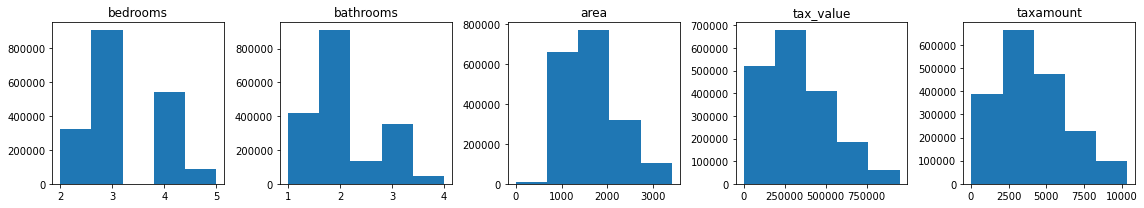

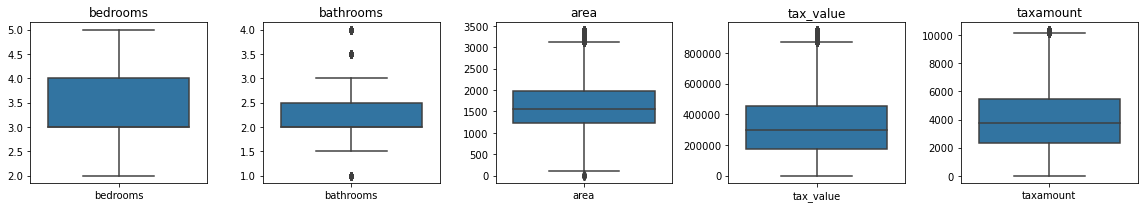

In [3]:
train, validate, test = wrangle_zillow()

In [4]:
train.shape, validate.shape, test.shape

((1038959, 7), (445269, 7), (371057, 7))

Here is a histogram of the dataset we will be working with.


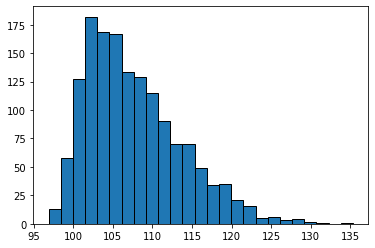

In [5]:
np.random.seed(123)

x = stats.skewnorm(7).rvs(1500) * 10 + 100
x = x.reshape(-1, 1)

plt.hist(x, bins=25,ec='black')
print('Here is a histogram of the dataset we will be working with.')

# 1
Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [6]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'taxamount',
       'fips'],
      dtype='object')

In [16]:
# Chose feaures to run
features = ['area', 'tax_value', 'taxamount']

In [18]:
# Note that we only call .fit with the training data,
x_train = train[features]
x_validate = train[features]
x_test = train[features]

Text(0.5, 1.0, 'Scaled')

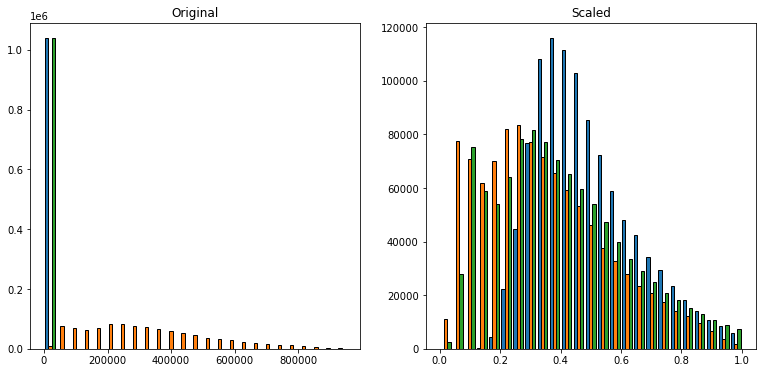

In [19]:
# Min-Max Scaling
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(train[features])

# but we use .transform to apply the scaling to all the data splits.
x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

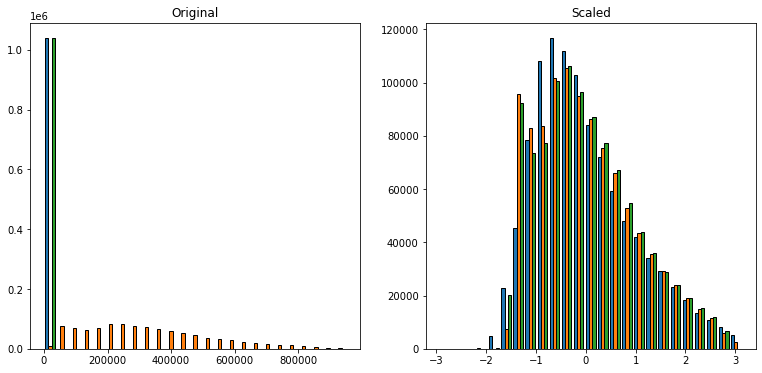

In [20]:
# Standard Scaler

scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

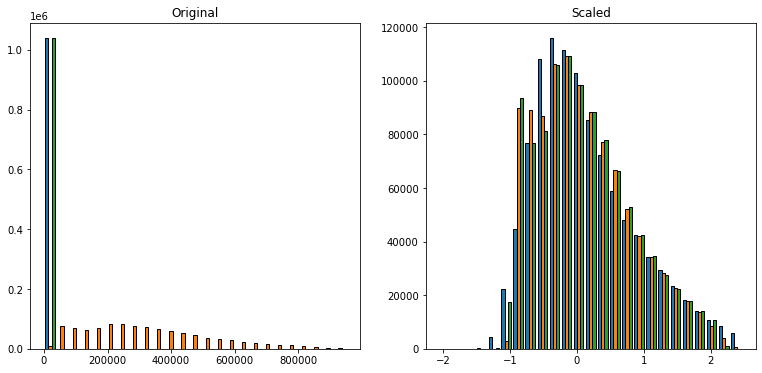

In [21]:
# RobustScaler

scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

# 2
Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [22]:
inverse_data = scaler.inverse_transform(x_train)
inverse_data

array([[1.18010300e+06, 6.91774615e+10, 7.82171920e+06],
       [1.33789800e+06, 2.46319821e+10, 5.22300176e+06],
       [1.09780800e+06, 2.26197024e+10, 4.09591378e+06],
       ...,
       [1.61120800e+06, 4.41612108e+10, 6.36382520e+06],
       [5.90448000e+05, 1.32972663e+11, 2.03250130e+07],
       [8.56208000e+05, 7.96164585e+10, 1.11286868e+07]])

In [24]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaled = scaler.fit_transform(train[features])
scaled


array([[0.4576122 , 0.26102987, 0.23984259],
       [0.5189205 , 0.09292915, 0.15946863],
       [0.42563802, 0.08533543, 0.1246097 ],
       ...,
       [0.62511   , 0.16662635, 0.19475238],
       [0.22851276, 0.50177302, 0.6265484 ],
       [0.33176885, 0.30042338, 0.34212152]])

In [26]:
scaled_df = pd.DataFrame(scaled, index = train.index, columns = [features])
scaled_df.head()

,area,tax_value,taxamount
10057,0.457612,0.261030,0.239843
2004970,0.518921,0.092929,0.159469
306031,0.425638,0.085335,0.124610
1038595,0.293048,0.125302,0.181516
270959,0.578762,0.454557,0.511229


In [27]:
# use inverse_transform method

scaler.inverse_transform(scaled_df)

array([[  1561.  , 248240.  ,   2504.4 ],
       [  1770.  ,  88390.  ,   1671.93],
       [  1452.  ,  81169.  ,   1310.88],
       ...,
       [  2132.  , 158470.  ,   2037.38],
       [   780.  , 477167.  ,   6509.69],
       [  1132.  , 285700.  ,   3563.75]])

In [29]:
# we can change numpy 2d array to a dataframe

unscaled_df = pd.DataFrame(scaler.inverse_transform(scaled), index = train.index, columns = [features])
unscaled_df.head()


,area,tax_value,taxamount
10057,1561.0,248240.0,2504.40
2004970,1770.0,88390.0,1671.93
306031,1452.0,81169.0,1310.88
1038595,1000.0,119174.0,1900.28
270959,1974.0,432268.0,5315.27


# 3
Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [32]:
def visualize_scaled_data(scaler, scaler_name, train, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')

    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout();

In [35]:
features

['area', 'tax_value', 'taxamount']

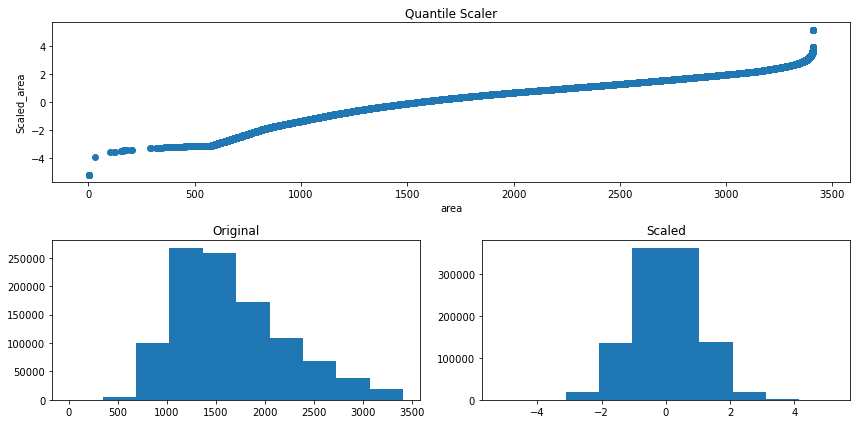

In [36]:
#visualize monthly charges quantile transformation with 'normal' output

visualize_scaled_data(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', train, 'area')

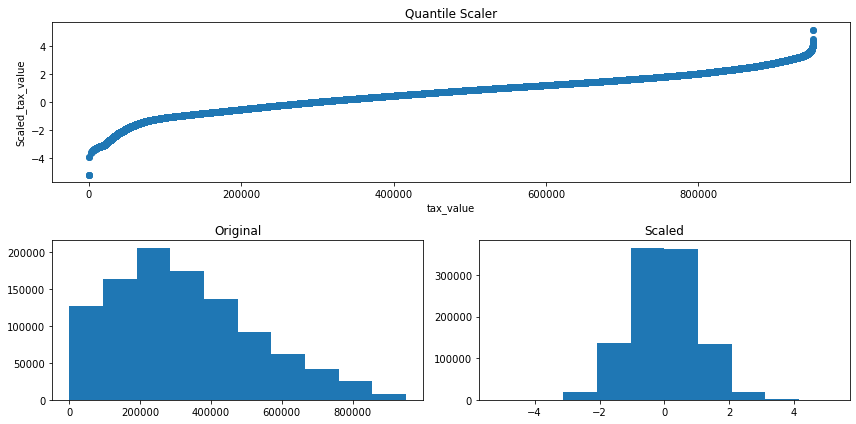

In [37]:
#visualize monthly charges quantile transformation with 'normal' output

visualize_scaled_data(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', train, 'tax_value')

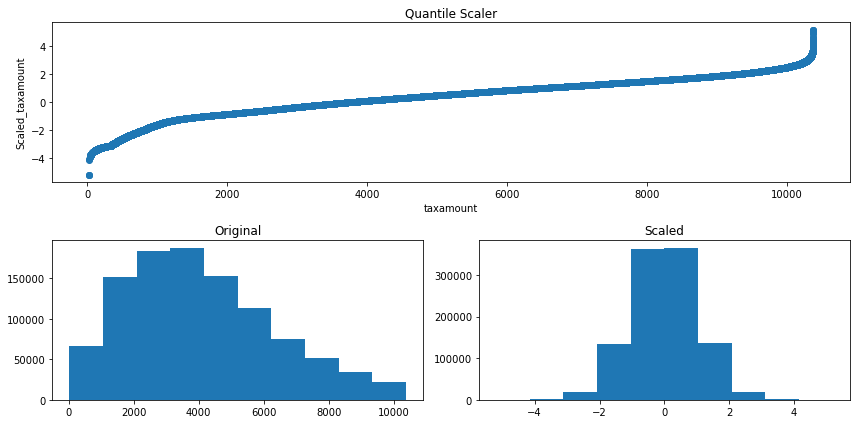

In [45]:
#visualize monthly charges quantile transformation with 'normal' output

visualize_scaled_data(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', train, 'taxamount')

# 4
Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [39]:
features

['area', 'tax_value', 'taxamount']

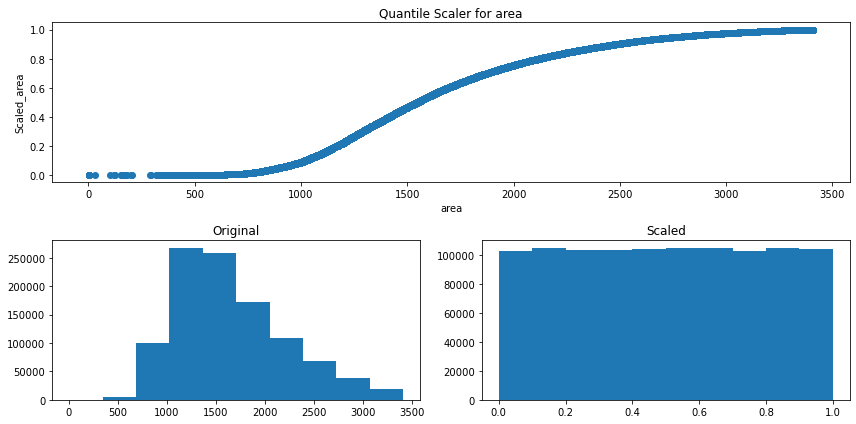

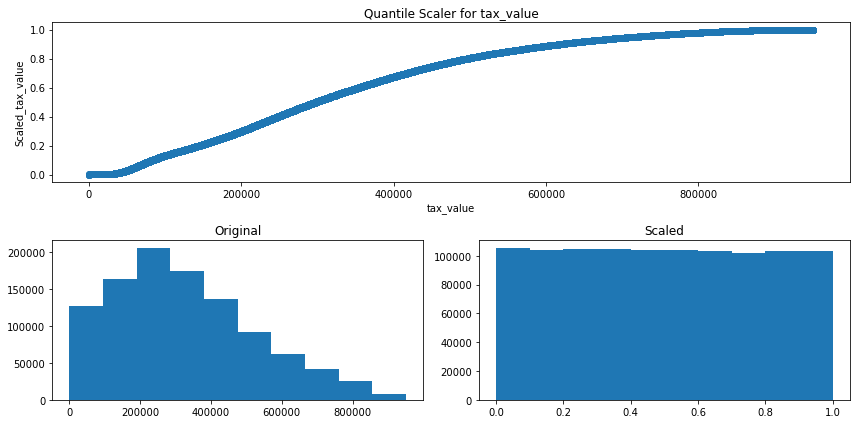

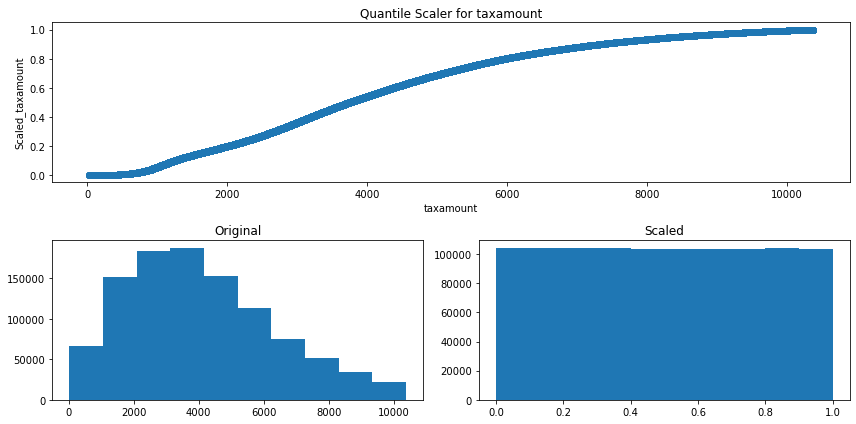

In [44]:
for col in features:
    visualize_scaled_data(sklearn.preprocessing.QuantileTransformer(), f'Quantile Scaler for {col}', train, col)
#visualize monthly charges quantile transformation with 'normal' output



# 5
Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!


In [ ]:
def Standard_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs
    """

    scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled


In [ ]:
def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled